In [1]:
import numpy as np
import pandas as pd

In [2]:
def leer_csv_a_dataframe(file_path):
    """
    Reads a CSV file from the given file path and returns a DataFrame.
    
    Parameters:
    - file_path (str): Path to the CSV file.
    
    Returns:
    - pd.DataFrame: DataFrame containing the CSV data.
    """
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        print("DataFrame created successfully!")
        return df
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
    except pd.errors.EmptyDataError:
        print("Error: The CSV file is empty.")
    except pd.errors.ParserError:
        print("Error: The CSV file could not be parsed.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [3]:
# definicion del ETL
# cargando datos en el DataFrame de pandas
df = leer_csv_a_dataframe('data/financial_regression.csv')
print(df.head())

DataFrame created successfully!
         date  sp500 open  sp500 high  sp500 low  sp500 close  sp500 volume  \
0  2010-01-14      114.49      115.14     114.42       114.93   115646960.0   
1  2010-01-15      114.73      114.84     113.20       113.64   212252769.0   
2  2010-01-18         NaN         NaN        NaN          NaN           NaN   
3  2010-01-19      113.62      115.13     113.59       115.06   138671890.0   
4  2010-01-20      114.28      114.45     112.98       113.89   216330645.0   

   sp500 high-low  nasdaq open  nasdaq high  nasdaq low  ...  palladium high  \
0            0.72        46.26       46.520       46.22  ...           45.02   
1            1.64        46.46       46.550       45.65  ...           45.76   
2             NaN          NaN          NaN         NaN  ...             NaN   
3            1.54        45.96       46.640       45.95  ...           47.08   
4            1.47        46.27       46.604       45.43  ...           47.31   

   palladium

### Perfilado de datos

In [4]:
# support fuctions
# https://www.datacamp.com/tutorial/exception-handling-python?utm_source=google&utm_medium=paid_search&utm_campaignid=21057859163&utm_adgroupid=157296744657&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=724847717722&utm_targetid=aud-1903815585993:dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=9047086&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-es-lang-en_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-dec24&gad_source=1&gclid=Cj0KCQiAvbm7BhC5ARIsAFjwNHv7ojN2n62qk_LoMMt_tv2sj4ccVWlCmBqOaeSaxQmacICmA-DgohwaAn7REALw_wcB
def cuenta_nas(df_in):
    # Identifica la cuenta de NaN por columna
    nan_conteo = df_in.isna().sum()

    # Imprime las cuentas de NaN por columna
    for columna, cuenta in nan_conteo.items():
        if cuenta > 0:
            print(f"Columna '{columna}' tiene {cuenta} NaN(s).")
        else:
            print(f"No hay NaN(s) en {columna}")
            
def muestra_cols_nas(df_in):
    # sow NAs rows
    for idx, row in df_in.iterrows():
        if row.isna().any():  # Check if the row contains any NaN
            print(f"Row {idx}: {row.tolist()}")
            
def imprime_cols_nas(df_in):
    try:
        nan_rows = df_in[df_in.isna().any(axis=1)]  # Select rows with any NaN
        for idx, row in nan_rows.iterrows():
            nan_columns = row[row.isna()].index.tolist()
            print(f"Index: {idx}, NaN columns: {nan_columns}")
    except:
        print("No Nans in this dataframe...")

def describe_df(df_in):
    # Create a summary DataFrame
    summary = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes.values,
        'Number of Records': len(df),
        'Unique Values': [df[col].nunique() for col in df.columns]
    })
    print(summary)

In [5]:
df.describe()


sp500 open   sp500 high    sp500 low  sp500 close  sp500 volume  \
count  3719.000000  3719.000000  3719.000000  3719.000000  3.719000e+03   
mean    268.732724   270.179765   267.157446   268.779352  1.124206e+08   
std     121.374890   122.024860   120.663204   121.393684  6.902901e+07   
min     103.110000   103.420000   101.130000   102.200000  1.708170e+05   
25%     169.715000   170.175000   169.030000   169.650000  6.699112e+07   
50%     241.180000   242.080000   239.450000   240.610000  9.239907e+07   
75%     374.455000   377.800000   371.045000   374.255000  1.367146e+08   
max     585.910000   586.120000   582.580000   584.590000  7.095045e+08   

       sp500 high-low  nasdaq open  nasdaq high  nasdaq low  nasdaq close  \
count     3719.000000  3719.000000  3719.000000  3719.00000   3719.000000   
mean         3.022320   181.394495   182.689784   179.98249    181.431795   
std          2.656917   122.468973   123.393400   121.43517    122.473492   
min          0.300000    42.670000    42.821500    41.55000     42.470000   
25%          1.280000    78.700000    79.150000    78.31500     78.730000   
50%          2.090000   138.720000   139.420000   138.02000    139.050000   
75%          3.815000   284.165000   287.590000   281.23000    284.835000   
max         22.960000   503.070000   503.520000   498.39000    502.960000   

       ...  palladium high  palladium low  palladium close  palladium volume  \
count  ...     3719.000000    3719.000000      3719.000000      3.719000e+03   
mean   ...      110.184473     107.931862       109.067990      7.169556e+04   
std    ...       58.454170      56.877967        57.688191      9.790703e+04   
min    ...       40.550000      38.490000        40.090000      3.157000e+03   
25%    ...       69.400000      68.270000        68.820000      2.085900e+04   
50%    ...       83.900000      82.650000        83.210000      3.829500e+04   
75%    ...      143.785000     140.480000       142.040000      8.420700e+04   
max    ...      298.210000     277.000100       295.000000      1.199042e+06   

       palladium high-low    gold open    gold high     gold low   gold close  \
count         3719.000000  3719.000000  3719.000000  3719.000000  3719.000000   
mean             2.252611   145.454975   146.101477   144.761329   145.453861   
std              2.543622    29.604259    29.754711    29.422517    29.611348   
min              0.230000   100.920000   100.990000   100.232600   100.500000   
25%              0.870000   120.555000   121.030000   120.170000   120.590000   
50%              1.414000   137.620000   138.140000   136.990000   137.710000   
75%              2.680000   167.770000   168.412500   167.055000   167.835000   
max             45.392300   253.080000   253.940000   252.520000   253.930000   

        gold volume  
count  3.719000e+03  
mean   9.658138e+06  
std    6.182342e+06  
min    1.436508e+06  
25%    5.795310e+06  
50%    8.087993e+06  
75%    1.156729e+07  
max    9.369811e+07  

[8 rows x 46 columns]

In [6]:
df.value_counts()


date        sp500 open  sp500 high  sp500 low  sp500 close  sp500 volume  sp500 high-low  nasdaq open  nasdaq high  nasdaq low  nasdaq close  nasdaq volume  nasdaq high-low  us_rates_%  CPI      usd_chf  eur_usd  GDP        silver open  silver high  silver low  silver close  silver volume  silver high-low  oil open  oil high  oil low  oil close  oil volume   oil high-low  platinum open  platinum high  platinum low  platinum close  platinum volume  platinum high-low  palladium open  palladium high  palladium low  palladium close  palladium volume  palladium high-low  gold open  gold high  gold low  gold close  gold volume
2010-04-01  117.80      118.2500    117.10     117.80       161083608.0   1.1500          48.34        48.7000      47.7900     48.16         83728600.0     0.9100           0.20        217.403  1.0559   1.3569   14980.193  17.8900      17.9500      17.7900     17.8400       96350.0        0.1600           41.01     41.290    40.9600  41.2400    9069978.0    0.3300    

In [7]:
df.dtypes

date                   object
sp500 open            float64
sp500 high            float64
sp500 low             float64
sp500 close           float64
sp500 volume          float64
sp500 high-low        float64
nasdaq open           float64
nasdaq high           float64
nasdaq low            float64
nasdaq close          float64
nasdaq volume         float64
nasdaq high-low       float64
us_rates_%            float64
CPI                   float64
usd_chf               float64
eur_usd               float64
GDP                   float64
silver open           float64
silver high           float64
silver low            float64
silver close          float64
silver volume         float64
silver high-low       float64
oil open              float64
oil high              float64
oil low               float64
oil close             float64
oil volume            float64
oil high-low          float64
platinum open         float64
platinum high         float64
platinum low          float64
platinum c

In [8]:
cuenta_nas(df)


No hay NaN(s) en date
Columna 'sp500 open' tiene 185 NaN(s).
Columna 'sp500 high' tiene 185 NaN(s).
Columna 'sp500 low' tiene 185 NaN(s).
Columna 'sp500 close' tiene 185 NaN(s).
Columna 'sp500 volume' tiene 185 NaN(s).
Columna 'sp500 high-low' tiene 185 NaN(s).
Columna 'nasdaq open' tiene 185 NaN(s).
Columna 'nasdaq high' tiene 185 NaN(s).
Columna 'nasdaq low' tiene 185 NaN(s).
Columna 'nasdaq close' tiene 185 NaN(s).
Columna 'nasdaq volume' tiene 185 NaN(s).
Columna 'nasdaq high-low' tiene 185 NaN(s).
Columna 'us_rates_%' tiene 3728 NaN(s).
Columna 'CPI' tiene 3728 NaN(s).
Columna 'usd_chf' tiene 210 NaN(s).
Columna 'eur_usd' tiene 210 NaN(s).
Columna 'GDP' tiene 3847 NaN(s).
Columna 'silver open' tiene 185 NaN(s).
Columna 'silver high' tiene 185 NaN(s).
Columna 'silver low' tiene 185 NaN(s).
Columna 'silver close' tiene 185 NaN(s).
Columna 'silver volume' tiene 185 NaN(s).
Columna 'silver high-low' tiene 185 NaN(s).
Columna 'oil open' tiene 185 NaN(s).
Columna 'oil high' tiene 185 Na

In [9]:
# standarize column names without blanks
# Replace spaces, dashes, and commas in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

In [10]:
muestra_cols_nas(df)


Row 0: ['2010-01-14', 114.49, 115.14, 114.42, 114.93, 115646960.0, 0.7199999999999989, 46.26, 46.52, 46.22, 46.39, 75209000.0, 0.3000000000000042, nan, nan, 1.0206, 1.4478, nan, 18.58, 18.7, 18.45, 18.66, 69804.0, 0.25, 39.3, 39.44, 38.88, 39.06, 8575821.0, 0.5599999999999952, 160.13, 161.85, 159.72, 161.45, 228500.0, 2.1299999999999955, 43.93, 45.02, 43.86, 44.84, 364528.0, 1.1600000000000037, 111.51, 112.37, 110.79, 112.03, 18305238.0]
Row 1: ['2010-01-15', 114.73, 114.84, 113.2, 113.64, 212252769.0, 1.6400000000000006, 46.46, 46.55, 45.65, 45.85, 126849300.0, 0.8999999999999986, nan, nan, 1.0264, 1.4376, nan, 18.54, 18.54, 18.36, 18.41, 205106.0, 0.1799999999999997, 38.97, 39.02, 38.28, 38.4, 12615299.0, 0.740000000000002, 160.68, 161.25, 159.5, 160.25, 189900.0, 1.75, 45.18, 45.76, 44.4, 45.76, 442210.0, 1.3599999999999994, 111.35, 112.01, 110.38, 110.86, 18000724.0]
Row 2: ['2010-01-18', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

Row 1285: ['2014-11-25', 207.54, 207.79, 206.8, 207.11, 79108301.0, 0.9899999999999808, 104.84, 105.15, 104.57, 104.84, 17525991.0, 0.5800000000000125, nan, nan, 0.9645, 1.2472, nan, 16.37, 16.4399, 16.2501, 16.4399, 103119.0, 0.1898000000000017, 29.04, 29.07, 28.01, 28.03, 24794239.0, 1.0599999999999987, 118.05, 119.0299, 118.05, 119.01, 71861.0, 0.9799000000000008, 77.64, 77.75, 77.0, 77.24, 209030.0, 0.75, 115.1, 115.47, 114.9, 115.38, 9051813.0]
Row 1286: ['2014-11-26', 207.29, 207.76, 207.03, 207.64, 62167832.0, 0.7299999999999898, 104.94, 105.58, 104.834, 105.52, 18973804.0, 0.7459999999999951, nan, nan, 0.9614, 1.2503, nan, 16.35, 16.392, 16.27, 16.3, 97965.0, 0.1219999999999998, 27.97, 28.18, 27.85, 27.9, 14993376.0, 0.3299999999999983, 118.95, 119.49, 118.7501, 119.14, 17981.0, 0.7398999999999916, 77.6, 78.058, 77.58, 78.0, 24242.0, 0.4780000000000086, 115.25, 115.34, 114.98, 115.16, 3184017.0]
Row 1287: ['2014-11-27', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

Row 2052: ['2017-10-19', 254.83, 255.83, 254.35, 255.79, 61903788.0, 1.4800000000000182, 148.02, 148.33, 147.27, 148.31, 27680285.0, 1.0600000000000025, nan, nan, 0.9751, 1.1842, nan, 16.59, 16.84, 16.59, 16.81, 65838.0, 0.25, 10.34, 10.419, 10.3205, 10.35, 11558090.0, 0.0985000000000013, 88.25, 88.64, 88.03, 88.25, 40998.0, 0.6099999999999994, 91.15, 92.18, 90.7, 91.86, 15052.0, 1.480000000000004, 122.2, 122.55, 122.111, 122.39, 5564004.0]
Row 2053: ['2017-10-20', 256.7, 257.14, 255.77, 257.11, 89176377.0, 1.369999999999976, 148.91, 149.04, 148.53, 148.71, 30173268.0, 0.5099999999999909, nan, nan, 0.9844, 1.177, nan, 16.7, 16.78, 16.52, 16.62, 139508.0, 0.2600000000000015, 10.29, 10.44, 10.285, 10.43, 11985252.0, 0.1549999999999993, 87.91, 88.31, 87.78, 88.29, 56314.0, 0.5300000000000011, 93.14, 93.37, 92.06, 93.13, 29188.0, 1.3100000000000025, 121.68, 121.98, 121.39, 121.61, 8481102.0]
Row 2054: ['2017-10-23', 257.48, 257.51, 256.02, 256.11, 63915306.0, 1.490000000000009, 149.01, 149

Row 2823: ['2020-09-18', 335.37, 335.49, 327.97, 330.65, 105877942.0, 7.519999999999982, 271.62, 272.09, 262.63, 266.87, 86251117.0, 9.45999999999998, nan, nan, 0.9096, 1.1857, nan, 25.94, 26.24, 25.8902, 25.92, 613636.0, 0.3497999999999983, 29.19, 29.43, 28.9, 29.06, 3058125.0, 0.5300000000000011, 88.07, 88.22, 87.18, 87.18, 126089.0, 1.039999999999992, 216.01, 221.38, 216.01, 220.97, 29778.0, 5.3700000000000045, 183.07, 184.09, 182.64, 183.2, 9959667.0]
Row 2824: ['2020-09-21', 325.7, 327.13, 321.73, 326.97, 99450829.0, 5.399999999999977, 262.52, 267.65, 260.11, 267.51, 57168570.0, 7.539999999999964, nan, nan, 0.9163, 1.1737, nan, 25.15, 25.29, 22.943, 23.9, 3068229.0, 2.3469999999999978, 28.67, 28.76, 27.6581, 28.29, 5361818.0, 1.1019000000000003, 85.11, 85.2959, 80.5, 83.39, 335714.0, 4.795900000000003, 217.0, 218.13, 210.0, 213.18, 44642.0, 8.129999999999995, 179.84, 180.29, 176.75, 179.52, 17436121.0]
Row 2825: ['2020-09-22', 328.57, 330.9, 325.86, 330.3, 63612107.0, 5.0399999999

Row 3457: ['2023-02-14', 411.24, 415.05, 408.511, 412.64, 88389313.0, 6.538999999999987, 302.89, 307.72, 300.91, 306.75, 64079057.0, 6.810000000000002, nan, nan, 0.9224, 1.0722, nan, 20.825, 21.11, 20.74, 21.01, 543863.0, 0.370000000000001, 68.22, 69.63, 68.01, 69.4, 1601529.0, 1.6199999999999903, 87.04, 88.64, 86.06, 86.35, 279612.0, 2.5799999999999983, 143.82, 145.675, 135.71, 139.68, 113956.0, 9.965000000000003, 171.97, 173.51, 171.41, 172.61, 5403099.0]
Row 3458: ['2023-02-15', 410.35, 414.06, 409.47, 413.98, 61685279.0, 4.589999999999975, 304.9, 309.27, 304.2, 309.1, 43427298.0, 5.069999999999993, nan, nan, 0.9238, 1.0683, nan, 20.66, 20.82, 20.64, 20.79, 317487.0, 0.1799999999999997, 68.79, 69.39, 67.8, 69.02, 1908779.0, 1.5900000000000034, 85.6, 86.07, 84.84, 84.97, 225644.0, 1.2299999999999898, 134.21, 137.45, 133.01, 136.0, 95710.0, 4.439999999999998, 170.6, 170.99, 170.16, 170.89, 5435337.0]
Row 3459: ['2023-02-16', 408.79, 412.91, 408.14, 408.28, 76431469.0, 4.77000000000003

In [11]:
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

            date  sp500_open  sp500_high  sp500_low  sp500_close  \
0     2010-01-14      114.49    115.1400   114.4200       114.93   
1     2010-01-15      114.73    114.8400   113.2000       113.64   
2     2010-01-18         NaN         NaN        NaN          NaN   
3     2010-01-19      113.62    115.1300   113.5900       115.06   
4     2010-01-20      114.28    114.4500   112.9800       113.89   
...          ...         ...         ...        ...          ...   
3899  2024-10-17      585.91    586.1200   582.1600       582.35   
3900  2024-10-18      584.07    585.3900   582.5800       584.59   
3901  2024-10-21      583.85    584.8500   580.6001       583.63   
3902  2024-10-22      581.05    584.5000   580.3800       583.32   
3903  2024-10-23      581.26    581.7086   574.4150       577.99   

      sp500_volume  sp500_high-low  nasdaq_open  nasdaq_high  nasdaq_low  ...  \
0      115646960.0          0.7200        46.26       46.520     46.2200  ...   
1      212252769.0   

In [12]:
imprime_cols_nas(df)


Index: 0, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 1, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 2, NaN columns: ['sp500_open', 'sp500_high', 'sp500_low', 'sp500_close', 'sp500_volume', 'sp500_high-low', 'nasdaq_open', 'nasdaq_high', 'nasdaq_low', 'nasdaq_close', 'nasdaq_volume', 'nasdaq_high-low', 'us_rates_%', 'CPI', 'usd_chf', 'eur_usd', 'GDP', 'silver_open', 'silver_high', 'silver_low', 'silver_close', 'silver_volume', 'silver_high-low', 'oil_open', 'oil_high', 'oil_low', 'oil_close', 'oil_volume', 'oil_high-low', 'platinum_open', 'platinum_high', 'platinum_low', 'platinum_close', 'platinum_volume', 'platinum_high-low', 'palladium_open', 'palladium_high', 'palladium_low', 'palladium_close', 'palladium_volume', 'palladium_high-low', 'gold_open', 'gold_high', 'gold_low', 'gold_close', 'gold_volume']
Index: 3, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 4, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 5, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 6, NaN col

Index: 677, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 678, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 679, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 680, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 681, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 682, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 683, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 684, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 685, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 686, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 687, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 688, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 689, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 690, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 691, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 692, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 693, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 694, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 695, NaN columns: ['s

Index: 1323, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 1324, NaN columns: ['sp500_open', 'sp500_high', 'sp500_low', 'sp500_close', 'sp500_volume', 'sp500_high-low', 'nasdaq_open', 'nasdaq_high', 'nasdaq_low', 'nasdaq_close', 'nasdaq_volume', 'nasdaq_high-low', 'us_rates_%', 'CPI', 'usd_chf', 'eur_usd', 'GDP', 'silver_open', 'silver_high', 'silver_low', 'silver_close', 'silver_volume', 'silver_high-low', 'oil_open', 'oil_high', 'oil_low', 'oil_close', 'oil_volume', 'oil_high-low', 'platinum_open', 'platinum_high', 'platinum_low', 'platinum_close', 'platinum_volume', 'platinum_high-low', 'palladium_open', 'palladium_high', 'palladium_low', 'palladium_close', 'palladium_volume', 'palladium_high-low', 'gold_open', 'gold_high', 'gold_low', 'gold_close', 'gold_volume']
Index: 1325, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 1326, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 1327, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 1328, NaN columns: ['us_rates_%', 'CPI', 'GDP']

Index: 1772, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 1773, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 1774, NaN columns: ['sp500_open', 'sp500_high', 'sp500_low', 'sp500_close', 'sp500_volume', 'sp500_high-low', 'nasdaq_open', 'nasdaq_high', 'nasdaq_low', 'nasdaq_close', 'nasdaq_volume', 'nasdaq_high-low', 'usd_chf', 'eur_usd', 'silver_open', 'silver_high', 'silver_low', 'silver_close', 'silver_volume', 'silver_high-low', 'oil_open', 'oil_high', 'oil_low', 'oil_close', 'oil_volume', 'oil_high-low', 'platinum_open', 'platinum_high', 'platinum_low', 'platinum_close', 'platinum_volume', 'platinum_high-low', 'palladium_open', 'palladium_high', 'palladium_low', 'palladium_close', 'palladium_volume', 'palladium_high-low', 'gold_open', 'gold_high', 'gold_low', 'gold_close', 'gold_volume']
Index: 1775, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 1776, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 1777, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 1778, NaN columns: [

Index: 2531, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 2532, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 2533, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 2534, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 2535, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 2536, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 2537, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 2538, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 2539, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 2540, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 2541, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 2542, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 2543, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 2544, NaN columns: ['sp500_open', 'sp500_high', 'sp500_low', 'sp500_close', 'sp500_volume', 'sp500_high-low', 'nasdaq_open', 'nasdaq_high', 'nasdaq_low', 'nasdaq_close', 'nasdaq_volume', 'nasdaq_high-low', 'usd_chf', 'eur_usd', 'GDP', 'silver_open', 'silver_high', 'silver_low',

Index: 3011, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3012, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3013, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3014, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3015, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3016, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3017, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3018, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3019, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3020, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3021, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3022, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3023, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3024, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3025, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3026, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3027, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3028, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 303

Index: 3489, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3490, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3491, NaN columns: ['sp500_open', 'sp500_high', 'sp500_low', 'sp500_close', 'sp500_volume', 'sp500_high-low', 'nasdaq_open', 'nasdaq_high', 'nasdaq_low', 'nasdaq_close', 'nasdaq_volume', 'nasdaq_high-low', 'usd_chf', 'eur_usd', 'silver_open', 'silver_high', 'silver_low', 'silver_close', 'silver_volume', 'silver_high-low', 'oil_open', 'oil_high', 'oil_low', 'oil_close', 'oil_volume', 'oil_high-low', 'platinum_open', 'platinum_high', 'platinum_low', 'platinum_close', 'platinum_volume', 'platinum_high-low', 'palladium_open', 'palladium_high', 'palladium_low', 'palladium_close', 'palladium_volume', 'palladium_high-low', 'gold_open', 'gold_high', 'gold_low', 'gold_close', 'gold_volume']
Index: 3492, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3493, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3494, NaN columns: ['us_rates_%', 'CPI', 'GDP']
Index: 3495, NaN columns: [

### Patrones de Nans
HAY 3719 registros
- NaN columns: ['us_rates_%', 'CPI', 'GDP'] borrar us_rates_% y CPI,
- NaN columns: ['sp500 open', 'sp500 high', 'sp500 low', 'sp500 close', 'sp500 volume', 'sp500 high-low', 'nasdaq open', 'nasdaq high', 'nasdaq low', 'nasdaq close', 'nasdaq volume', 'nasdaq high-low', 'us_rates_%', 'CPI', 'usd_chf', 'eur_usd', 'GDP', 'silver open', 'silver high', 'silver low', 'silver close', 'silver volume', 'silver high-low', 'oil open', 'oil high', 'oil low', 'oil close', 'oil volume', 'oil high-low', 'platinum open', 'platinum high', 'platinum low', 'platinum close', 'platinum volume', 'platinum high-low', 'palladium open', 'palladium high', 'palladium low', 'palladium close', 'palladium volume', 'palladium high-low', 'gold open', 'gold high', 'gold low', 'gold close', 'gold volume'] borrar toda el renglon
- NaN columns: ['GDP'] borrar GDP
- NaN columns: ['us_rates_%', 'CPI', 'usd_chf', 'eur_usd', 'GDP']  usd_chf, eur_usd interpolar
analizar el diccionario de datos antes de quitar o convertir Nans

In [13]:
# Maneja Nans
# delete rows
# Specify the columns to check for NaN
columns_to_check = ['sp500_open', 'sp500_high', 'sp500_low']

# Drop rows where any of the specified columns have NaN
df_cleaned = df
df_cleaned.dropna(subset=columns_to_check, inplace=True)
print(" drop rows")
describe_df(df_cleaned)


 drop rows
           Column Name Data Type  Number of Records  Unique Values
0                 date    object               3719           3719
1           sp500_open   float64               3719           3498
2           sp500_high   float64               3719           3496
3            sp500_low   float64               3719           3477
4          sp500_close   float64               3719           3494
5         sp500_volume   float64               3719           3719
6       sp500_high-low   float64               3719           1610
7          nasdaq_open   float64               3719           3443
8          nasdaq_high   float64               3719           3485
9           nasdaq_low   float64               3719           3491
10        nasdaq_close   float64               3719           3449
11       nasdaq_volume   float64               3719           3718
12     nasdaq_high-low   float64               3719           1880
13          us_rates_%   float64               3719

In [14]:
# delete cols
cols_drop = ['GDP', 'CPI', 'us_rates_%']
df_cleaned.drop(columns=cols_drop, inplace=True)
print(" drop cols")
describe_df(df_cleaned)

 drop cols
           Column Name Data Type  Number of Records  Unique Values
0                 date    object               3719           3719
1           sp500_open   float64               3719           3498
2           sp500_high   float64               3719           3496
3            sp500_low   float64               3719           3477
4          sp500_close   float64               3719           3494
5         sp500_volume   float64               3719           3719
6       sp500_high-low   float64               3719           1610
7          nasdaq_open   float64               3719           3443
8          nasdaq_high   float64               3719           3485
9           nasdaq_low   float64               3719           3491
10        nasdaq_close   float64               3719           3449
11       nasdaq_volume   float64               3719           3718
12     nasdaq_high-low   float64               3719           1880
13             usd_chf   float64               3719

#### Cleaned
3874 - 3719 = 155 out

#### Analisis
caso
- NaN columns: ['GDP'] interpolar sobre la columna
- NaN columns: ['us_rates_%', 'CPI', 'GDP']   interpolar sobre columna 
###### https://saturncloud.io/blog/python-pandas-how-to-remove-nan-and-inf-values/#:~:text=Using%20dropna()&text=By%20default%2C%20it%20removes%20all,remove%20columns%20instead%20of%20rows.&text=In%20this%20example%2C%20the%20dropna,None%20value%20in%20column%20C.

In [19]:
# interpolate cols
# usd_chf, eur_usd interpolar analizar el diccionario de datos antes de quitar o convertir Nans
muestra_cols_nas(df_cleaned)
# Interpolate specific columns
columns_to_interpolate = ['usd_chf', 'eur_usd']  # Specify columns
df_cleaned[columns_to_interpolate] = df_cleaned[columns_to_interpolate].interpolate(method='polynomial', order=2)
describe_df(df_cleaned)
#print(df_cleaned)


Row 194: ['2010-10-11', 116.72, 116.97, 116.25, 116.65, 102920611.0, 0.7199999999999989, 49.78, 50.02, 49.62, 49.77, 46880000.0, 0.4000000000000057, nan, nan, 23.09, 23.29, 22.97, 23.22, 269646.0, 0.3200000000000003, 35.85, 36.09, 35.6, 35.6, 4600454.0, 0.490000000000002, 168.58, 168.58, 167.521, 167.815, 34000.0, 1.059000000000026, 58.5, 58.73, 58.04, 58.53, 149729.0, 0.6899999999999977, 131.28, 132.33, 130.98, 132.292, 10618516.0]
Row 217: ['2010-11-11', 121.05, 121.82, 120.68, 121.64, 157659616.0, 1.1399999999999864, 52.9, 53.48, 52.66, 53.385, 85163600.0, 0.8200000000000003, nan, nan, 27.4, 27.6698, 26.84, 27.62, 372618.0, 0.8297999999999988, 37.9, 38.04, 37.76, 37.84, 8849109.0, 0.2800000000000011, 174.45, 174.7, 173.26, 174.64, 39800.0, 1.4399999999999975, 71.3, 71.48, 69.45, 71.07, 279282.0, 2.030000000000001, 137.62, 137.75, 136.45, 137.66, 15380502.0]
Row 253: ['2010-12-31', 125.53, 125.87, 125.33, 125.75, 91206861.0, 0.5400000000000063, 54.6, 54.62, 54.21, 54.46, 38540100.0, 

Row 3102: ['2021-10-11', 437.16, 440.26, 434.62, 434.69, 65233285.0, 5.639999999999986, 359.58, 363.2, 358.3, 358.39, 34847182.0, 4.899999999999977, nan, nan, 21.84, 21.99, 21.75, 21.75, 332625.0, 0.2399999999999984, 56.41, 56.69, 56.125, 56.18, 3831740.0, 0.5649999999999977, 96.0, 96.27, 93.86, 94.01, 65051.0, 2.4099999999999966, 200.02, 200.62, 196.93, 196.97, 51194.0, 3.6899999999999977, 164.04, 164.58, 163.91, 163.92, 3820087.0]
Row 3125: ['2021-11-11', 465.21, 465.29, 463.75, 463.77, 34848495.0, 1.5400000000000205, 392.57, 392.75, 390.24, 390.59, 32242983.0, 2.509999999999991, nan, nan, 24.18, 24.3499, 24.13, 24.32, 472533.0, 0.2199000000000026, 56.44, 56.85, 55.82, 56.22, 5376341.0, 1.0300000000000011, 101.59, 101.88, 100.98, 101.48, 81868.0, 0.8999999999999915, 192.08, 193.5, 191.19, 192.49, 25856.0, 2.3100000000000023, 173.98, 174.27, 173.74, 174.12, 5959640.0]
Row 3161: ['2021-12-31', 475.64, 476.86, 474.67, 474.96, 63617437.0, 2.1899999999999977, 399.66, 401.0589, 397.34, 397

In [22]:
cuenta_nas(df_cleaned)
#muestra_cols_nas(df_cleaned)

No hay NaN(s) en date
No hay NaN(s) en sp500_open
No hay NaN(s) en sp500_high
No hay NaN(s) en sp500_low
No hay NaN(s) en sp500_close
No hay NaN(s) en sp500_volume
No hay NaN(s) en sp500_high-low
No hay NaN(s) en nasdaq_open
No hay NaN(s) en nasdaq_high
No hay NaN(s) en nasdaq_low
No hay NaN(s) en nasdaq_close
No hay NaN(s) en nasdaq_volume
No hay NaN(s) en nasdaq_high-low
Columna 'usd_chf' tiene 3 NaN(s).
Columna 'eur_usd' tiene 3 NaN(s).
No hay NaN(s) en silver_open
No hay NaN(s) en silver_high
No hay NaN(s) en silver_low
No hay NaN(s) en silver_close
No hay NaN(s) en silver_volume
No hay NaN(s) en silver_high-low
No hay NaN(s) en oil_open
No hay NaN(s) en oil_high
No hay NaN(s) en oil_low
No hay NaN(s) en oil_close
No hay NaN(s) en oil_volume
No hay NaN(s) en oil_high-low
No hay NaN(s) en platinum_open
No hay NaN(s) en platinum_high
No hay NaN(s) en platinum_low
No hay NaN(s) en platinum_close
No hay NaN(s) en platinum_volume
No hay NaN(s) en platinum_high-low
No hay NaN(s) en palla

In [29]:
# reemplaza los 3 Nans
df_cleaned = df_cleaned.apply(lambda col: col.fillna(col.mean()) if col.dtype != object else col)
cuenta_nas(df_cleaned)

No hay NaN(s) en date
No hay NaN(s) en sp500_open
No hay NaN(s) en sp500_high
No hay NaN(s) en sp500_low
No hay NaN(s) en sp500_close
No hay NaN(s) en sp500_volume
No hay NaN(s) en sp500_high-low
No hay NaN(s) en nasdaq_open
No hay NaN(s) en nasdaq_high
No hay NaN(s) en nasdaq_low
No hay NaN(s) en nasdaq_close
No hay NaN(s) en nasdaq_volume
No hay NaN(s) en nasdaq_high-low
No hay NaN(s) en usd_chf
No hay NaN(s) en eur_usd
No hay NaN(s) en silver_open
No hay NaN(s) en silver_high
No hay NaN(s) en silver_low
No hay NaN(s) en silver_close
No hay NaN(s) en silver_volume
No hay NaN(s) en silver_high-low
No hay NaN(s) en oil_open
No hay NaN(s) en oil_high
No hay NaN(s) en oil_low
No hay NaN(s) en oil_close
No hay NaN(s) en oil_volume
No hay NaN(s) en oil_high-low
No hay NaN(s) en platinum_open
No hay NaN(s) en platinum_high
No hay NaN(s) en platinum_low
No hay NaN(s) en platinum_close
No hay NaN(s) en platinum_volume
No hay NaN(s) en platinum_high-low
No hay NaN(s) en palladium_open
No hay N

#### Analisis de la informacion
El valor del indice sp500 al cierre (Y), depende de todos esos componentes (Xis), analizar en que medida es esto cierto y aqui queda muy bien el analisis de componentes


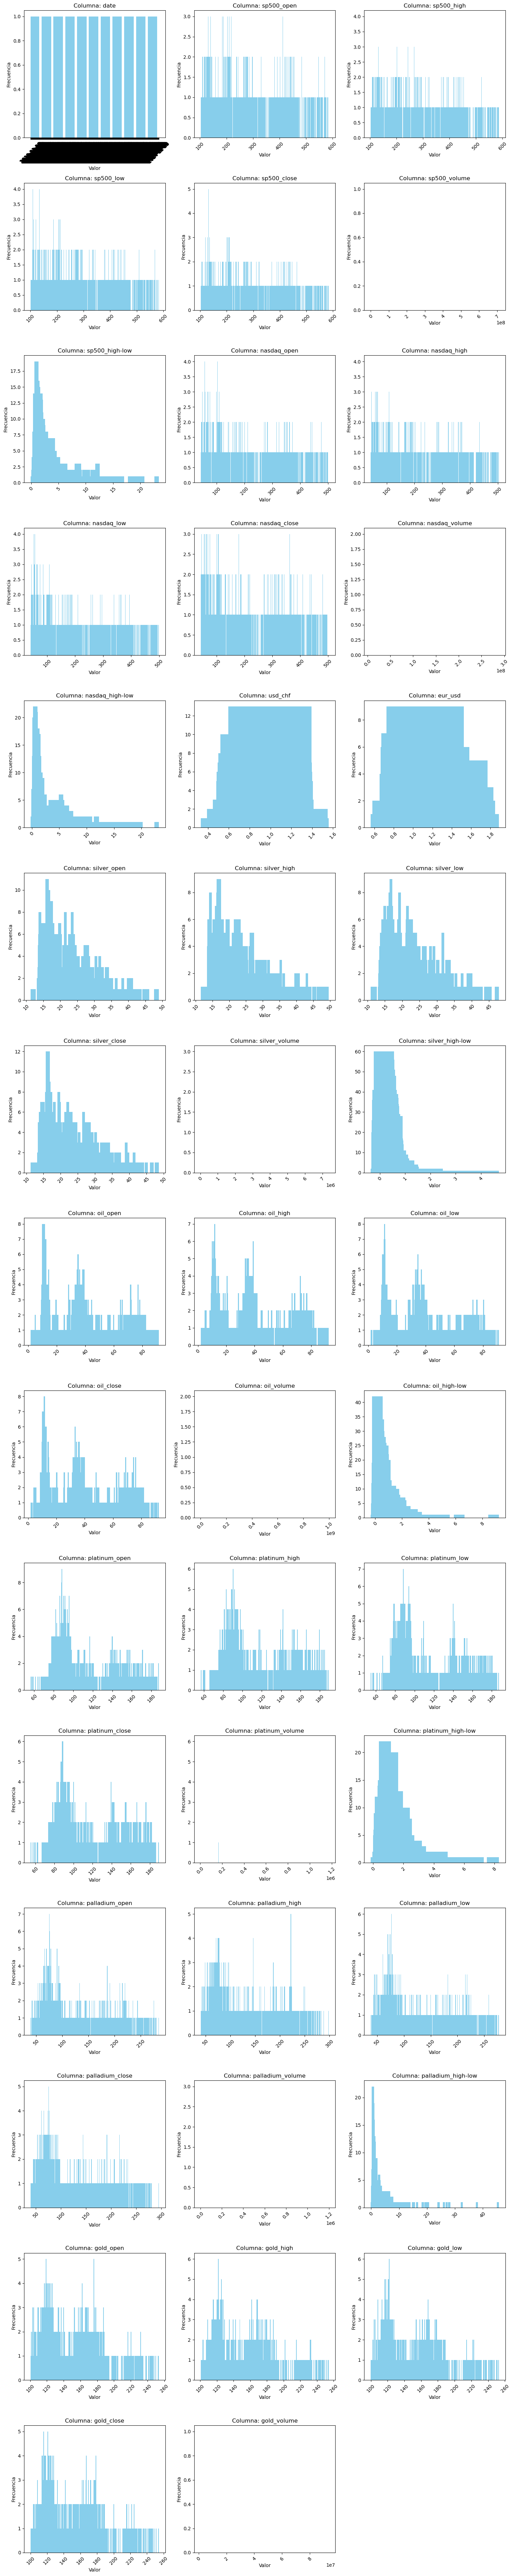

In [30]:
import matplotlib.pyplot as plt

def graficar_valores_unicos_por_columna(df_in, columnas=None, graficos_por_linea=3):
    """
    Genera gráficos de barras para los valores únicos de cada columna de un DataFrame.
    
    Args:
        df (pd.DataFrame): DataFrame a analizar.
        columnas (list): Lista de columnas a procesar (opcional, por defecto se procesan todas las columnas).
        graficos_por_linea (int): Número de gráficos por línea (default: 3).
    """
    # Usar todas las columnas si no se especifican
    if columnas is None:
        columnas = df_in.columns
    
    num_columnas = len(columnas)
    filas = (num_columnas + graficos_por_linea - 1) // graficos_por_linea  # Número total de filas necesarias
    
    # Crear los subplots
    fig, axes = plt.subplots(filas, graficos_por_linea, figsize=(15, 5 * filas))
    axes = axes.flatten()  # Aplanar para acceder a cada subplot de forma sencilla
    
    for i, columna in enumerate(columnas):
        # Contar valores únicos
        conteo = df_in[columna].value_counts()
        
        # Crear gráfico de barras
        axes[i].bar(conteo.index, conteo.values, color='skyblue')
        axes[i].set_title(f"Columna: {columna}")
        axes[i].set_xlabel("Valor")
        axes[i].set_ylabel("Frecuencia")
        axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje X para claridad
    
    # Desactivar los gráficos vacíos (si hay menos columnas que subplots)
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")
    
    plt.tight_layout()
    plt.show()
        
graficar_valores_unicos_por_columna(df_cleaned)


#### Data OK
No hay valores etiquetados, todos son numericos

### Podemos desarrollar la regresion lineal multivariada
### Conceptos Clave
1. **Ecuación de la regresión lineal multivariada**:
   \[
   y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
   \]
   - \(y\): Variable dependiente.
   - \(x_1, x_2, \dots, x_n\): Variables independientes.
   - \(\beta_0, \beta_1, \dots, \beta_n\): Coeficientes que se ajustan en el modelo.
   - \(\epsilon\): Error residual.

2. **Pasos básicos**:
   - Preparar los datos. (listo)
   - Dividirlos en conjuntos de entrenamiento y prueba.
   - Ajustar el modelo.
   - Evaluar el rendimiento.

In [31]:
# Separar variables independientes (X) y dependiente (y)
# price es la dependiente (y)
# las demas son independientes para este modelo (X)
# queremos decir entonces que el preciodepende de los valores de todas las anteriores
# quitar ID

X = df_cleaned[[
    'sp500_open', #X[0]
    'sp500_high', #X[1]
    'sp500_low', #X[2]
    'sp500_volume', #X[3]
    'sp500_high-low', #X[4]
    'nasdaq_open', #X[5]
    'nasdaq_high', #X[6]
    'nasdaq_low', #X[7]
    'nasdaq_close', #X[8]
    'nasdaq_volume', #X[9]
    'nasdaq_high-low', #X[10]
    'usd_chf', #X[11]
    'eur_usd', #X[12]
    'silver_open', #X[13]
    'silver_high', #X[14]
    'silver_low', #X[15]
    'silver_close', #X[16]
    'silver_volume', #X[17]
    'silver_high-low', #X[18]
    'oil_open', #X[19]
    'oil_high', #X[20]
    'oil_low', #X[21]
    'oil_close', #X[22]
    'oil_volume', #X[23]
    'oil_high-low', #X[24]
    'platinum_open', #X[25]
    'platinum_high', #X[26]
    'platinum_low', #X[27]
    'platinum_close', #X[28]
    'platinum_volume', #X[29]
    'platinum_high-low', #X[30]
    'palladium_open', #X[31]
    'palladium_high', #X[32]
    'palladium_low', #X[33]
    'palladium_close', #X[34]
    'palladium_volume', #X[35]
    'palladium_high-low', #X[36]
    'gold_open', #X[37]
    'gold_high', #X[38]
    'gold_low', #X[39]
    'gold_close', #X[40]
    'gold_volume' #X[41]
]]
y = df_cleaned[['sp500_close']]
print("X ", X.shape, "y ", y.shape)

X  (3719, 42) y  (3719, 1)


In [32]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# el 20% es dato de prueba y 80% de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html
# Crear el modelo de regresión lineal
modelo = LinearRegression()
# Ajustar el modelo a los datos de entrenamiento (80%) ajutando a esta cantidad de datos
modelo.fit(X_train, y_train)

# los betas entrenados
print(f"Coeficientes beta:\n{modelo.coef_}, dim: {(modelo.coef_).shape}")
coef_train = modelo.coef_
# el intercepto entrenado
print(f"Intercepto: {modelo.intercept_}")

Coeficientes beta:
[[-1.66915969e-01  5.76510732e-01  5.91108867e-01 -9.67652614e-10
  -1.45981981e-02  2.01421448e-01 -5.73065493e-01 -5.91948871e-01
   9.62511768e-01  1.83857237e-09  1.88833564e-02 -4.24348438e-02
  -4.78886901e-01  2.62909277e-02 -9.77211307e-02 -1.25437381e-01
   1.96992441e-01 -3.98447843e-08  2.77162492e-02 -3.10075755e-02
  -7.44028432e-02 -5.50466276e-02  1.62345032e-01  3.06019593e-10
  -1.93562156e-02 -1.57793009e-02 -1.92153666e-02 -4.58857894e-02
   8.20623975e-02 -7.83425765e-08  2.66704228e-02 -1.73570246e-02
   4.20528313e-03 -3.57941456e-03  1.57685559e-02  3.04174555e-08
   7.78469769e-03  5.14689091e-02  1.24773104e-02  2.23641675e-02
  -8.68700940e-02 -1.41607446e-09]], dim: (1, 42)
Intercepto: [0.59035816]


In [34]:
# Predecir con el modelo, los datos de prueba
y_pred = modelo.predict(X_test)
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [35]:
# mostrar los resultados ya ajustados
coef_adj = modelo.coef_
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("Score:", modelo.score(X, y)) # el 87.21 % del modelo se explica con las variables elegidas
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R2):", r2)

Coeficientes: [[-1.66915969e-01  5.76510732e-01  5.91108867e-01 -9.67652614e-10
  -1.45981981e-02  2.01421448e-01 -5.73065493e-01 -5.91948871e-01
   9.62511768e-01  1.83857237e-09  1.88833564e-02 -4.24348438e-02
  -4.78886901e-01  2.62909277e-02 -9.77211307e-02 -1.25437381e-01
   1.96992441e-01 -3.98447843e-08  2.77162492e-02 -3.10075755e-02
  -7.44028432e-02 -5.50466276e-02  1.62345032e-01  3.06019593e-10
  -1.93562156e-02 -1.57793009e-02 -1.92153666e-02 -4.58857894e-02
   8.20623975e-02 -7.83425765e-08  2.66704228e-02 -1.73570246e-02
   4.20528313e-03 -3.57941456e-03  1.57685559e-02  3.04174555e-08
   7.78469769e-03  5.14689091e-02  1.24773104e-02  2.23641675e-02
  -8.68700940e-02 -1.41607446e-09]]
Intercepto: [0.59035816]
Score: 0.9999797748308418
Error cuadrático medio (MSE): 0.3360002255673828
Coeficiente de determinación (R2): 0.9999785964765748


/var/folders/s8/2lk1tq9d6_31q71bjqgm6kk40000gn/T/ipykernel_17480/3819717719.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


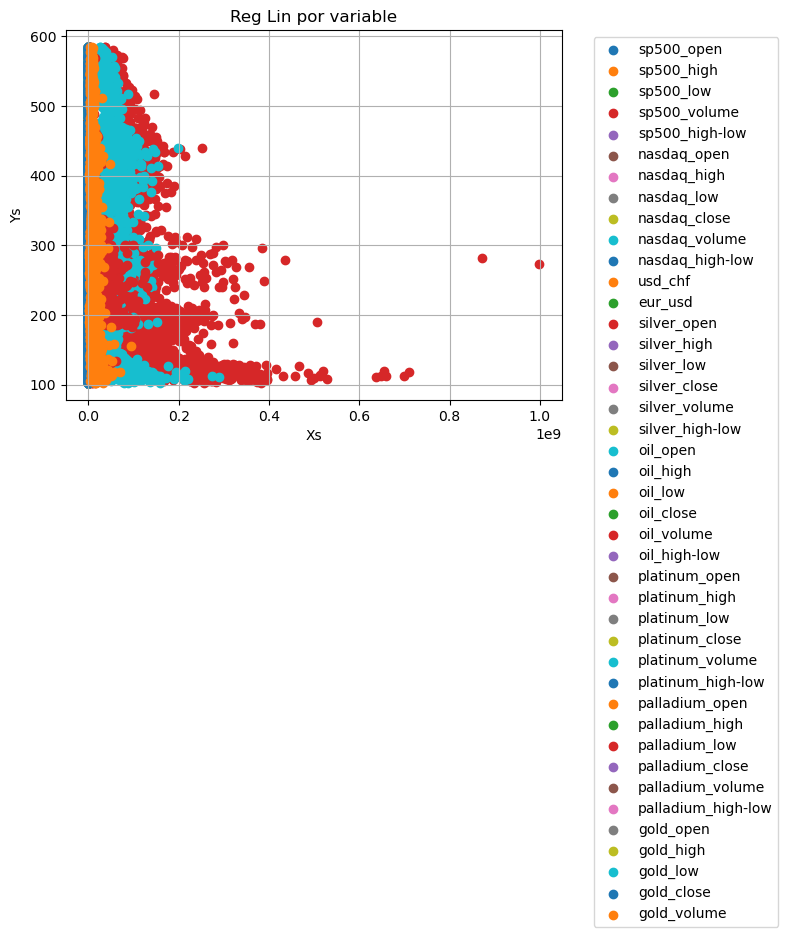

In [36]:
# mostrar los grupos como diagrama de dispersion
for column in X.columns:
    #print(column)
    plt.scatter(X[column], y, label=column, marker='o')

plt.title("Reg Lin por variable")
plt.xlabel("Xs")
plt.ylabel("Ys")
# poner la leyenda fuera del grafico
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
# mostrar la gradilla
plt.grid(True)
plt.show()

In [37]:
# Comparar con tolerancia
comparacion_cercana = np.allclose(coef_adj, coef_train, atol=0.001)
print("\n¿Son cercanos los arreglos (con tolerancia)?")
print(comparacion_cercana)
# Verificar si tienen la misma forma
misma_forma = coef_adj.shape == coef_train.shape
print("\n¿Tienen la misma forma?")
print(misma_forma)
# Diferencia absoluta
diferencia = np.abs(coef_adj - coef_train)
print("\nDiferencia absoluta entre arreglos:")
print(diferencia)


¿Son cercanos los arreglos (con tolerancia)?
True

¿Tienen la misma forma?
True

Diferencia absoluta entre arreglos:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


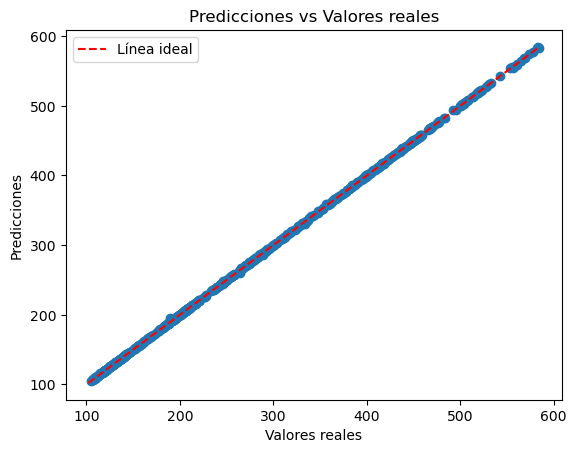

In [38]:
# recta de regresion
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Línea ideal")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.legend()
plt.title("Predicciones vs Valores reales")
plt.show()